## Basic Random Variable Modeling

### Imports & Auxillary functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def generate(generator, n):
    return [generator() for _ in range(n)]

def visualize_random_numbers(
    random_numbers,
    generator_name
):
    fig, ax = plt.subplots(1, 2, figsize=(6, 3))
    plt.suptitle(generator_name)
    random1 = np.array(random_numbers)[0::2]
    random2 = np.array(random_numbers)[1::2]
    ax[0].scatter(list(random1), list(random2), s=7)
    ax[1].hist(random_numbers, bins=10)
    ax[1].set_xlabel("Bins from range [0, 1)]")
    ax[1].set_ylabel("Number of random values")
    plt.tight_layout()

### 1. Multiplicative Congruent Generator

In [3]:
class MultCongGenerator:
    
    def __init__(self, alpha0, betta, m):
        self.alpha = alpha0
        self.betta = betta
        self.m = m
    
    def __call__(self):
        self.alpha = (self.alpha * self.betta) % self.m
        return self.alpha / self.m
    

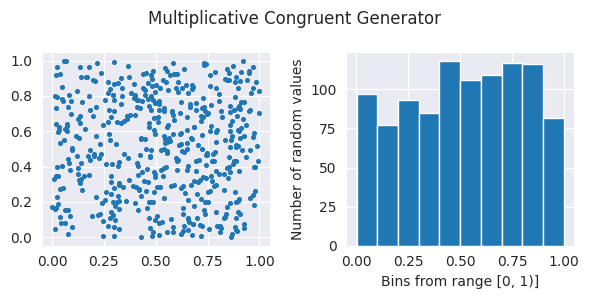

In [4]:
# Initial values
n = 1000
m = 2 ** 31
c1 = 19581355
alpha0, betta = 24149775, max(c1, m - c1) 

# Generating random numbers
mc_generator = MultCongGenerator(alpha0, betta, m)
random_numbers1 = generate(mc_generator, n)

# Visualizing
visualize_random_numbers(
    random_numbers1,
    generator_name="Multiplicative Congruent Generator"
)

In [5]:
random_numbers1[0], random_numbers1[14]

(0.6143295741640031, 0.7920782654546201)

### 2. MacLaren–Marsaglia Generator

In [6]:
class MacLarenMarsagliaGenerator:
    def __init__(self, gen_betta, gen_gamma, k):
        self.gen_betta = gen_betta
        self.gen_gamma = gen_gamma
        self.k = k
        self.v = [gen_betta() for _ in range(k)]
    
    def __call__(self):
        s = int(self.gen_gamma() * self.k)
        alpha = self.v[s]
        self.v[s] = self.gen_betta()
        return alpha

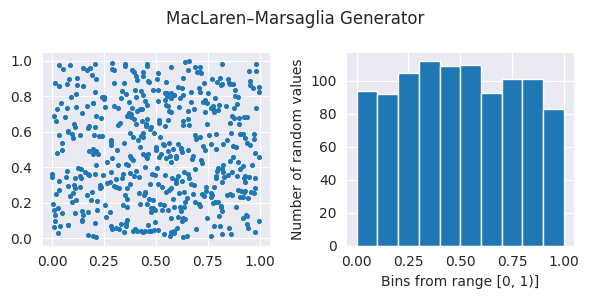

In [7]:
# Initial values
n = 1000
k = 128
# Second Base Random generator instance
m = 2 ** 31
c2 = 457816087
alpha0, betta = 179029053, max(m - c2, c2)
mc_generator2 = MultCongGenerator(alpha0, betta, k)

# Generating random numbers
mm_generator = MacLarenMarsagliaGenerator(
    mc_generator,
    mc_generator2, 
    k
)
random_numbers2 = generate(mm_generator, n)

# Visualizing
visualize_random_numbers(
    random_numbers2,
    generator_name="MacLaren–Marsaglia Generator"
)

In [8]:
random_numbers2[0], random_numbers2[14]
# 0.008959, 0.61433

(0.6319203707389534, 0.4773669275455177)

## Statistical Hypothesis Testing

### 1. Kolmogorov

In [9]:
KOLMOGOROV_STAT = 1.358 # for 0.05 significance level

# kolmogorov for U[0, 1] distribution
def kolmogorov(values):
    values = sorted(values)
    n = len(values)
    sup_dist = 0
    for i in range(0, n):
        f1 = i / n
        f_real = values[i]
        f2 = (i + 1) / n
        dist = max(abs(f1 - f_real), abs(f2 - f_real))
        if dist > sup_dist:
            sup_dist = dist 
    stat_real = n**0.5 * sup_dist
    return stat_real

In [10]:
print("Multiplicative Congruent Generator")
print(f"Kolmogorov statistic: {kolmogorov(random_numbers1)}\n")
print("MacLaren–Marsaglia Generator")
print(f"Kolmogorov statistic: {kolmogorov(random_numbers2)}\n")
print(f"Value for 0.05 significance: {KOLMOGOROV_STAT}")

Multiplicative Congruent Generator
Kolmogorov statistic: 1.6439506744654535

MacLaren–Marsaglia Generator
Kolmogorov statistic: 0.7694296100103712

Value for 0.05 significance: 1.358


H0 hypothesis is not rejected

### 2. Chi-Square Statistic

In [11]:
# chi-square delta for significance level 0.05

epsilon = 0.05
DELTA = {
    2: 3.841,   3: 5.991,   4: 7.815,   5: 9.488,
    6: 11.070,   7: 12.592,  8: 14.067,  9: 15.507, 10: 16.919,
    11: 18.307, 12: 19.675, 13: 21.026, 14: 22.362, 15: 23.685,
    16: 24.996, 17: 26.296, 18: 27.587, 19: 28.869, 20: 30.144, 
    21: 31.410, 22: 32.671, 23: 33.924, 24: 35.172, 25: 36.415,
    26: 37.652, 27: 38.885, 28: 40.113, 29: 41.337, 30: 42.557
}

In [12]:
def get_set_p(values, segments): 
    n = len(values)
    k = len(segments)
    segments = list(segments)
    segments.append(1)
    counts = np.array([0] * k)
    # last_position = 0
    val_idx = 0
    for seg_idx in range(1, k + 1):
        while val_idx < n and \
            values[val_idx] < segments[seg_idx]:
            val_idx += 1
            counts[seg_idx - 1] +=1
    return counts / n


# pearson for U[0, 1] distribution
def pearson(values, k=25):
    values = sorted(values)
    n = len(values)
    min_val = values[0]
    max_val = values[-1]

    step = (max_val - min_val) / k
    segments = np.arange(min_val, max_val, step)
    # segments' p for uniform distribution
    p_real = np.array([1/k] * k)
    p_set = get_set_p(values, segments)

    stat = n * sum([
        ((p_real[i] - p_set[i]) ** 2 / p_real[i]) for i in range(k)
    ])
    return stat


In [13]:
k = 25
pearson(random_numbers1, k), 
print("Multiplicative Congruent Generator")
print(f"Chi-Square statistic: {pearson(random_numbers1)}\n")
print("MacLaren–Marsaglia Generator")
print(f"Chi-Square statistic: {pearson(random_numbers2)}\n")
print(f"Value for 0.05 significance and k={k}: {DELTA[k] }")

Multiplicative Congruent Generator
Chi-Square statistic: 29.15

MacLaren–Marsaglia Generator
Chi-Square statistic: 16.825000000000003

Value for 0.05 significance and k=25: 36.415


H0 hypothesis is not rejected